## Generate a cloud of points around a given lat lon location

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import HTML

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean

#JUPYTER notebook magics
%matplotlib inline 

In [2]:
# define a function for later use (plotting purposes)

def Fnospines(ax,pspines=False,paxis='off'):
    """
    Remove spines from around the plot
    
    Return: (ax)
    """
    ax.spines['top'].set_visible(pspines)
    ax.spines['right'].set_visible(pspines)
    ax.spines['bottom'].set_visible(pspines)
    ax.spines['left'].set_visible(pspines)
    ax.axis(paxis)

In [4]:
# define a function to generate a cloud of points around a given lat lon location


import numpy as np

def init_particleset(Rt=6371*1000, Np=2000, sigmar=100000, lonref=38.5, latref=4.5, rseed=11):
    """Initialize a particle set with a Gaussian distribution around a reference point of latitude and longitude.

    Args:
        Rt (float, optional): Radius of the Earth (if spherical). Set to 0 if plan geometry needed. Defaults to 6371*1000.
        Np (int, optional): Number of particles. Defaults to 2000.
        sigmar (float, optional): Standard deviation in meters (dispersion of the particles). Defaults to 100000 m.
        lonref (float, optional): Longitude of the reference point in degrees. Defaults to 38.5.
        latref (float, optional): Latitude of the reference point in degrees. Defaults to 4.5.
        rseed (int, optional): Parameter to make random numbers predictable and reproducible. Defaults to 11.

    Returns:
        tuple: Tuple containing latitude and longitude arrays of the initialized particle set.
    """
    np.random.seed(rseed) 
    
    # Convert latitude and longitude to radians
    latref_rad = np.radians(latref)
    lonref_rad = np.radians(lonref)

    # Angle follows a random uniform distribution
    bearing_rad  = np.random.uniform(low=0.0, high=2.*np.pi, size=Np)

    # The squared-distance to the reference point (distance^2) follows a chi-square distribution
    # The distance variable then follows the chi-distribution (or the Maxwell–Boltzmann distribution)
    x = np.random.normal(loc=0.0, scale=sigmar, size=Np)
    y = np.random.normal(loc=0.0, scale=sigmar, size=Np)
    distance = np.sqrt(x**2 + y**2) 
    
    # Calculate the great-circle distance in radians
    delta_phi_rad = distance / Rt

    # Calculate the new latitude using the haversine formula
    new_lat_rad = np.arcsin(np.sin(latref_rad) * np.cos(delta_phi_rad) + np.cos(latref_rad) * np.sin(delta_phi_rad) * np.cos(bearing_rad))
    # Calculate the new longitude using the haversine formula
    new_lon_rad = lonref_rad + np.arctan2(np.sin(bearing_rad) * np.sin(delta_phi_rad) * np.cos(latref_rad), np.cos(delta_phi_rad) - np.sin(latref_rad) * np.sin(new_lat_rad))

    # Convert latitude and longitude back to degrees
    lat = np.degrees(new_lat_rad)
    lon = np.degrees(new_lon_rad)

    return lat, lon

* Test on all-arctic map:

/Users/leroux/anaconda3/envs/jupy/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


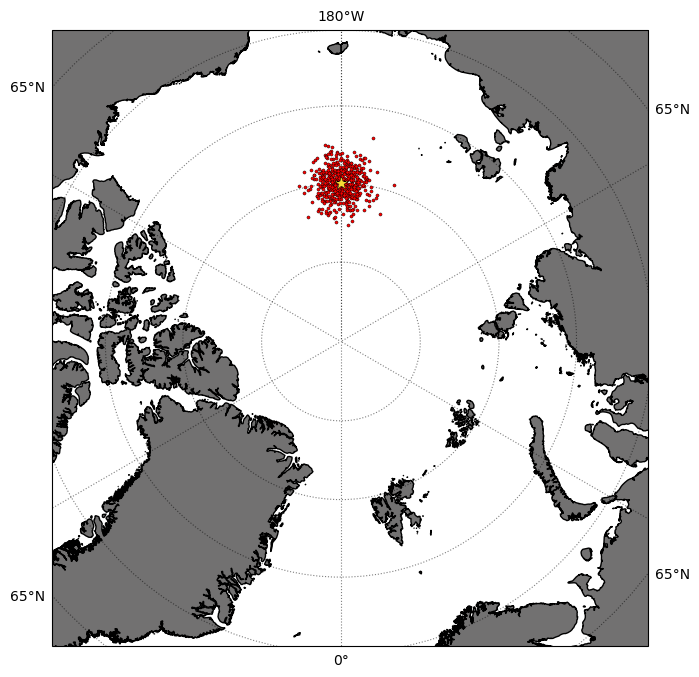

In [5]:
lonref=180
latref=80

latpt,lonpt = init_particleset(Rt=6371*1000, Np=500, sigmar=100e3, lonref=lonref, latref=latref, rseed=11)

#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 70, 90], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# plot scattered points (no line in between)
traj=plt.scatter(x=lonpt,
               y=latpt,
               alpha=1, 
               s=20,
            linewidths=0.3,
            marker='.',
            facecolors='r', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 

# plot scattered points (no line in between)
traj=plt.scatter(x=lonref,
               y=latref,
               alpha=1, 
               s=100,
            linewidths=0.3,
            marker='*',
            facecolors='#f5dd35', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')


* Test on a zoomed map

/Users/leroux/anaconda3/envs/jupy/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


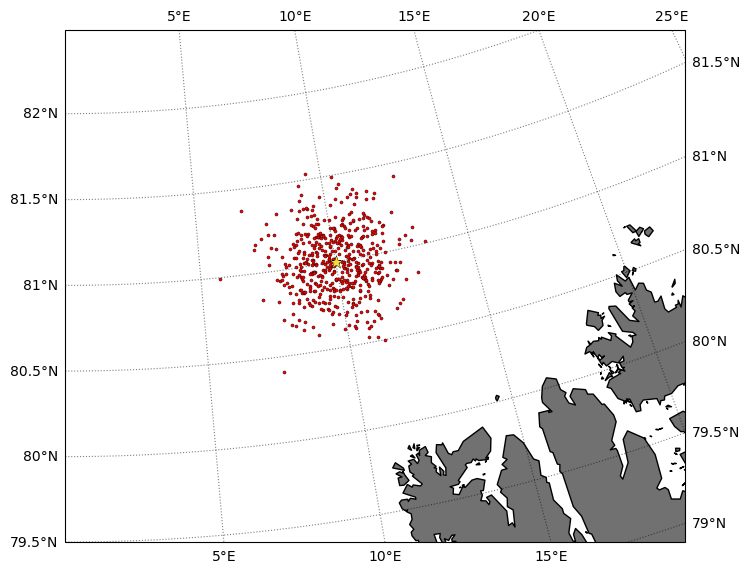

In [6]:
lonref=10
latref=81

latpt,lonpt = init_particleset(Rt=6371*1000, Np=500, sigmar=20e3, lonref=lonref, latref=latref, rseed=11)

#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
#ax.set_extent([-180, 180, 70, 90], trdata)
ax.set_extent([0, 20, 79.5, 82], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# plot scattered points (no line in between)
traj=plt.scatter(x=lonpt,
               y=latpt,
               alpha=1, 
               s=20,
            linewidths=0.3,
            marker='.',
            facecolors='r', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 

# plot scattered points (no line in between)
traj=plt.scatter(x=lonref,
               y=latref,
               alpha=1, 
               s=100,
            linewidths=0.3,
            marker='*',
            facecolors='#f5dd35', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')
